In [6]:
cd drive/My\ Drive/LSTM

/content/drive/My Drive/LSTM


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

df = pd.read_csv('spam.csv',delimiter=',', encoding='latin-1')
print(df.head())

# delete unncessary columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

# # Multi-column frequency count 
count = df.groupby(['v1']).count() 
print(count)

# # plt.xlabel('Label')
# # #plt.title('Number of ham and spam messages')
# # count.plot(kind = 'bar', title ="spam vs ham")

# sns.countplot(df.v1)
# plt.xlabel('Label')
# plt.title('Number of ham and spam messages')





     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
        v2
v1        
ham   4825
spam   747


Before Under Sampling


Text(0.5, 1.0, 'Number of ham and spam messages')

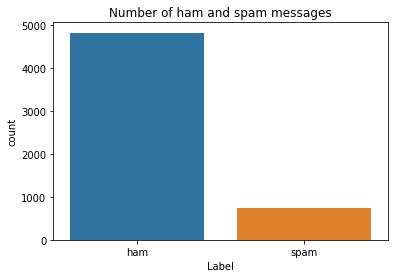

In [81]:
print("Before Under Sampling")
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [82]:
ham_indices = df[df.v1 == 'ham'].index
print("No.of.data points belongs to ham",len(ham_indices))
print(ham_indices)

No.of.data points belongs to ham 4825
Int64Index([   0,    1,    3,    4,    6,    7,   10,   13,   14,   16,
            ...
            5560, 5561, 5562, 5563, 5564, 5565, 5568, 5569, 5570, 5571],
           dtype='int64', length=4825)


In [83]:
spam_indices = df[df.v1 == 'spam'].index
print("No.of.data points belongs to spam",len(ham_indices))
print(spam_indices)

No.of.data points belongs to spam 4825
Int64Index([   2,    5,    8,    9,   11,   12,   15,   19,   34,   42,
            ...
            5492, 5497, 5501, 5524, 5526, 5537, 5540, 5547, 5566, 5567],
           dtype='int64', length=747)


In [0]:
# get the data based on class ham /spam
ham = df[df['v1'] == 'ham']
spam = df[df['v1'] == 'spam']

In [85]:
print(ham)
print(spam)

       v1                                                 v2
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
3     ham  U dun say so early hor... U c already then say...
4     ham  Nah I don't think he goes to usf, he lives aro...
6     ham  Even my brother is not like to speak with me. ...
...   ...                                                ...
5565  ham                                       Huh y lei...
5568  ham              Will Ì_ b going to esplanade fr home?
5569  ham  Pity, * was in mood for that. So...any other s...
5570  ham  The guy did some bitching but I acted like i'd...
5571  ham                         Rofl. Its true to its name

[4825 rows x 2 columns]
        v1                                                 v2
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you hav

In [0]:
# Random under-sampling

In [0]:
 ham_under=ham.sample(2*len(spam)) # down sample to the lenght of spam from the length of ham data

In [0]:
df_under = pd.concat([ham_under,spam], axis=0)

Number of spam  messages 747
Number of ham messages 1494


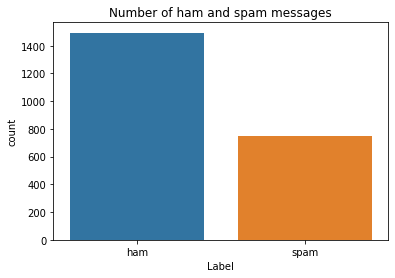

In [118]:
sns.countplot(df_under.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
print("Number of spam  messages",len(df_under[df_under['v1']=='spam']))
print("Number of ham messages",len(df_under[df_under['v1']=='ham']))

In [0]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [123]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [124]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.3086 - accuracy: 0.8825 - val_loss: 0.1139 - val_accuracy: 0.9620
Epoch 2/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.0757 - accuracy: 0.9815 - val_loss: 0.0564 - val_accuracy: 0.9863
Epoch 3/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0709 - val_accuracy: 0.9810


In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [126]:
accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 1s 745us/step


In [127]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.081
  Accuracy: 0.972
